# 综述
要点：MSE，交叉熵损失函数

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from sklearn.datasets.samples_generator import make_regression
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

from sklearn.datasets import make_gaussian_quantiles
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
import ml_tools
from sklearn.model_selection import train_test_split

# 逻辑回归

标准逻辑斯蒂分布：$\lambda =1，\mu =0 $，如下（密度函数为${F(x)}'$）：

$$
F(x) = \frac{1}{1 + e^{-x}}
$$





## 对数几率
对数几率($logit(p) = log\frac{p}{1-p} = log \frac{P(Y=1|x)}{1 - P(Y=1|x)}=w \cdot x$)：`输出Y=1的对数几率就是输入x的线性函数`，于是，可以推导出,特征x时，Y=1的条件概率：$P(Y=1|x) = \frac{e^{\omega x}}{1 + e^{\omega x}}$

> $$ {ln \frac{P(Y=1|x)}{1 - P(Y=1|x)}=\omega x\\\Rightarrow \frac{P(Y=1|x)}{1 - P(Y=1|x)} = e^{\omega x} \\\Rightarrow P(Y=1|x) = (1 - P(Y=1|x)) \cdot e^{\omega x} \\\Rightarrow P(Y=1|x) = \frac{e^{\omega x}}{1 + e^{\omega x}}}
$$


选择sigmod函数原因
> 前提需要了解一下 𝕨𝕩 与0的关系，大于0是正例，小于0是负例，理想状态是阶跃函数，这表示了为什么需要sigmod函数（这里是对数几率函数），可微

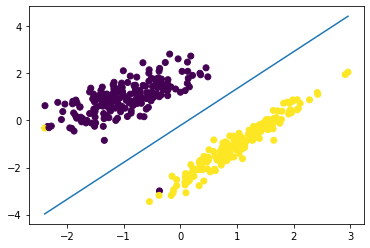

In [6]:
# 画图展现：wx ～ 0来表明正负例关系
X1, Y1 = make_classification(n_samples=400, n_features=2, n_redundant=0,
                             n_clusters_per_class=1, n_classes=2)
# 暂时不用
clf = LogisticRegression(C=1e5, max_iter=50000)
# Create an instance of Logistic Regression Classifier and fit the data.
clf.fit(X1, np.ravel(Y1))
import copy
xl = copy.deepcopy(X1[:, 0])
xl.sort()
Y1_V = []
for i in xl:
    v = clf.coef_[0][0]/clf.coef_[0][1] * i * -1 -  clf.intercept_/clf.coef_[0][1]
    Y1_V.append(v)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
plt.plot(xl, Y1_V)
plt.show()

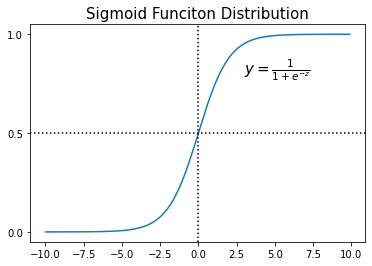

In [14]:
# sigmod函数
def Sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
h = Sigmoid(x)  # Sigmoid函数
plt.plot(x, h)
plt.axvline(0.0, ls='dotted', color='k')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0,  0.5, 1.0])  # y axis label
plt.title(r'Sigmoid Funciton Distribution', fontsize = 15)
plt.text(3,0.8,r'$y = \frac{1}{1+e^{-z}}$', fontsize = 15)
#plt.text(3,0.6,r'$x = wz+b$', fontsize = 18)
plt.show()

## 参数估计：极大似然估计
于是极大似然估计求参数：$L(w) = \prod_{i=1}^{N} [P(Y=1|x)]^{y_i}[1 - P(Y=1|x)]^{1 - y_i}$，最大对数似然推导如下：
$$
\iota (\omega ) = {\sum_{i=1}^{N}[y_iln P + (1 - y_i)ln(1 - P]\\
=\sum_{i=1}^{N}[y_iln\pi(x) + (1 - y_i)ln(1 - \pi(x))]\\
= \sum_{i=1}^{N}[y_iln\frac{\pi(x)}{1-\pi(x)} + ln(1-\pi(x))],将式子拆开,按照y_i合并\\
=\sum_{i=1}^{N}[y_i(w \cdot x_i) - ln(1 + e^{w \cdot x_i})]}
$$

## 传统GD推导
$$
{
h_{\theta}(x^i) = \frac{1}{1 + e^{-{\theta}^Tx^{i}}}\\
J(\theta)=-\sum_{i=1}^{m}(y^{i}log\ {h_{\theta}(x^i)} + (1 - y^i)log(1 - h_{\theta}(x^i))
}
$$
第一步：求基础导数:
$$
{{h_{\theta}(x^i)}' = \frac{e^{-{\theta}^Tx^{i}}\cdot x_{j}^{i}}{(1 + e^{-{\theta}^Tx^{i}})^2} \\
{1 - h_{\theta}(x^i)}' = -{h_{\theta}(x^i)}'
}
$$
第二步：损失函数求导（凸函数，使用GD训练），第一步公式代入
$$
{\frac{\partial J(\theta)}{\partial \theta_j}=-\sum_{i=1}^{m}(y^{i}{h_{\theta}(x^i)}' \cdot \frac{1}{h_{\theta}(x^i)} + (1 - y^i){(1 - h_{\theta}(x^i))}' \cdot \frac{1}{1 - h_{\theta}(x^i)}) \\
= x_{j}^{i}\sum_{i}(h_{\theta}(x^i) - y^i)
}
$$


## 多分类问题
one vs one：两两作为反例，训练分类器，于是就有N(N-1)/2个分类结果。预测时进行投票

one vs rest：训练N个分类器。预测时，如果只有一个为正例，那就是这个分类，如果有多个，则选阈值最大的

many vs many(ECOD算法):
- 编码：N个类别进行M次划分，每次划分一部分类别为正例，一部分为反例，形成M个训练集
- 解码：M个分类器对样本做预测，形成一个预测编码，与每个类别各自编码比较，距离最小的就是相应编码。（海明距离，欧式距离）


## 类别不均衡问题
本身优化的是对数几率，阈值设置为0.5也表明分类器认为正负样例相同，当正反不同时，令$m^+$为正样例数，$m^-$负样例数。基于假设：`无偏采样`，于是，理想情况
$$
\frac{y}{1-y} > \frac{m^+}{m^-}
$$
就判定为正。

但是分类器是根据：$\frac{y}{1-y} > 1$来决策。于是，可以对公式进行简单修改：
$$
\frac{{y}'}{1 - {y}'} = \frac{y}{1-y} \cdot \frac{m^-}{m^+}
$$
这就是缩放技术。也就是上一个式子两边乘以$\frac{m^-}{m^+}$转换为了机器学习人类其的决策方法。`难点在于：训练集是无偏采样，无法根据上式推断出真是的对数几率`。

实际操作中采用的三个方法：

1）欠采样，直接对反例进行欠采样，去掉一些反例，让正负样例均衡。
> 时间开销低，如果随机丢失，会导致丢掉重要信息，最合适的是`使用集成学习机制，反例分成若干分，供不同学习器使用`，看起来每个学习器欠采样，总体却不会。

2）过采样，增加一些正例，是正负样例均衡
> 不能简单的对初始样本进行采样，否则会严重的过拟合。需要使用插值来产生新的样例。如SMOTE算法。

3）直接使用原始训练集训练，用分类器预测时，将$\frac{{y}'}{1 - {y}'} = \frac{y}{1-y} \cdot \frac{m^-}{m^+}$嵌入到决策过程，称为阈值转移。

# 相对熵（KL散度）与交叉熵的关系

参考：https://www.cnblogs.com/wangguchangqing/p/12068084.html

KL散度:
$$
D_{KL}(p||q) = \sum_{i}p(x_i)log\frac{p(x_i)}{q(x_i)}
$$
相对熵有如下性质：

1. 如果p，q分布相等，则相对熵等于0
2. $D_{KL}(p||q) \neq D_{KL}(q||p)$，相对熵不具有对称性
3. $D_{KL}(p||q) > 0$



熵：
$$
H(p)=-\sum_{i}p(x_i)logp(x_i)
$$
交叉熵
$$
H(p,q) = -\sum_{i}p(x_i)log\ q(x_i)
$$
于是：$D_{KL}(p||q)=H(p,q) - H(p)$，从训练的角度，$H(p)$表示训练集的熵，是个常数，所以，优化交叉熵就是优化相对熵。





# Ref

https://zhuanlan.zhihu.com/p/74874291 很好的讨论了logistic分由来，$\mathbb{wx}$与0的关系

https://www.cnblogs.com/ljygoodgoodstudydaydayup/p/6340129.htmllabel取1,-1时可以看到第二种二分类log loss定义（此处参考P()Y=1|x）定义

# sklearn举例

In [8]:
# 读取数据
data = pd.read_csv('../../../learnMLData/heart_disease/processed.cleveland.data')
# 处理异常值
data["ca"] = pd.to_numeric(data["ca"], errors='coerce').fillna(method='ffill')
data["thal"] = pd.to_numeric(data["thal"], errors='coerce').fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    float64
 1   sex         303 non-null    float64
 2   cp          303 non-null    float64
 3   trestbps    303 non-null    float64
 4   chol        303 non-null    float64
 5   fbs         303 non-null    float64
 6   restecg     303 non-null    float64
 7   thalach     303 non-null    float64
 8   exang       303 non-null    float64
 9   oldpeak     303 non-null    float64
 10  slope       303 non-null    float64
 11  ca          303 non-null    float64
 12  thal        303 non-null    float64
 13  predictnum  303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [9]:
# 处理label：label分为5类0,1,2,3,4,5
for idx,row in data.iterrows():
    data.loc[idx,"label0"] = 0
    data.loc[idx,"label1"] = 0
    data.loc[idx,"label2"] = 0
    data.loc[idx,"label3"] = 0
    data.loc[idx,"label4"] = 0
    if row["predictnum"] == 0:
        data.loc[idx,"label0"] = 1
    elif row["predictnum"] == 1:
        data.loc[idx,"label1"] = 1
    elif row["predictnum"] == 2:
        data.loc[idx,"label2"] = 1
    elif row["predictnum"] == 3:
        data.loc[idx,"label3"] = 1
    elif row["predictnum"] == 4:
        data.loc[idx,"label4"] = 1
    else:
        pass
    
    # 增加而分类标签
    if row["predictnum"] == 0:
        data.loc[idx,"bin_label"] = 0
    else:
        data.loc[idx,"bin_label"] = 1


In [10]:
feature_index = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
# 特征
X = data[feature_index].values
# 输出值
y = data[["predictnum"]].values
y_all=data[["predictnum", "label0","label1","label2","label3","label4"]].values

In [11]:
# 抽样
X_train, X_test, y_train_all, y_test_all = train_test_split(X, y_all, random_state=1)
# 暂时不用
clf = LogisticRegression(C=1e5, max_iter=50000)
# Create an instance of Logistic Regression Classifier and fit the data.
clf.fit(X_train, np.ravel(y_train_all[:,0]))

LogisticRegression(C=100000.0, max_iter=50000)

In [15]:
# 抽样产出概率：每个类别概率
p_list = clf.predict_proba(X_test[1, :].reshape(1, -1))
# 验证概率和=0
p_list[0][0] + p_list[0][1] + p_list[0][2] + p_list[0][3] + p_list[0][4]

# 预测标记
clf.predict(X[1, :].reshape(1, -1))
# 系数
Sigmoid(np.dot(clf.coef_, X[1, :]) + clf.intercept_)

# clf.predict_proba(X[1, :].reshape(1, -1))[1]相等

# 输出系数
clf.coef_

array([[ 7.42293624e-03, -1.12297874e+00, -4.61674402e-01,
        -1.37952782e-02, -3.12498360e-03,  1.22705739e+00,
        -1.97619515e-01,  1.39148693e-02, -1.10019628e+00,
        -4.01546508e-01, -4.60918963e-01, -1.16404906e+00,
        -2.82711487e-01],
       [-9.65778661e-03,  7.52971139e-01, -6.26857179e-02,
         9.57490426e-04,  4.50247094e-04,  3.95573054e-01,
        -1.82530769e-02, -9.47560911e-03,  1.32454314e-01,
        -2.51642307e-01, -1.44760280e-01, -1.44241965e-01,
        -1.74331411e-01],
       [-1.50785247e-02,  3.41577214e-01,  4.83138474e-01,
         1.78072654e-03,  5.60337739e-03,  1.55611309e+00,
        -4.22591124e-01, -1.29911945e-02,  1.72770450e-01,
         2.02285318e-01,  5.76946925e-02,  2.13578885e-01,
         5.35566180e-02],
       [-2.16708777e-02, -2.08268718e-01,  2.90279881e-02,
         4.93889149e-03,  5.67684649e-04,  1.50264606e+00,
         1.82383543e-01, -1.05969779e-02,  4.25498379e-02,
         2.14863686e-01, -2.54435998e

In [16]:
# 输出所有样例正负概率
y_test_score = clf.predict_proba(X_test[:, :])
y_test_label = y_test_all[:,1:]

In [17]:
fpr,tpr,roc_auc = ml_tools.cal_roc(y_test_label, y_test_score,5)

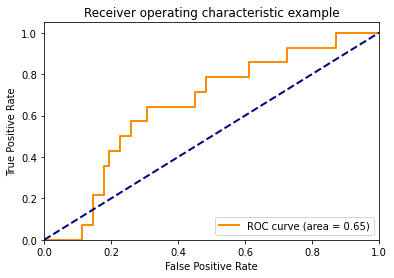

In [18]:
plt.figure()
label_idx = 1
lw = 2
plt.plot(fpr[label_idx], tpr[label_idx], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[label_idx])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()